# 
**is it possible the dataset is the proof of [language] from outer space**
 
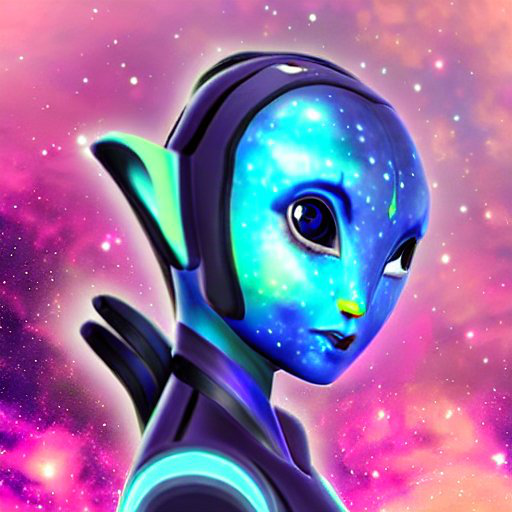


# abstract [what]
gpt is mainly for language model, to prediction next word(s) in sequence. however, this notebook (and other very early open notebooks, see [appendix] ) shows the [datasets] from the iceCube Neutrino Observatory may contain <b>language-like [structures]</b>, after using gpt to predict neutrino particle’s direction.

# introduction [why]
the <b>primage use cases</b> for gpt based model is known for [languege] related dataset. for instance, text and images, these are language related, and the <b>[known true]</b> is, there are some <b>[logics] or [intelligent]</b> inside of human text, human created images. however, in this notebook (and other very early open notebooks, see [appendix] ), shows that <b>non-language-related</b> dataset from iceCube Neutrino Observatory, can be predicted in next sequence just like the [lauguage] can be predicted from gpt based model for the [next word], and because of:

<li>consistency of how <font color='orange'><b>prediction pattern</b></font> of reaching to <font color='orange'><b>[0.0]</b></font> angular-dist-score from multiple different datasets (see train-test-split).  </li>
<li>the nature of gpt is unsupervised learning. </li>
<li>total of 688898 characters, size of <b>unique</b> chars <font color='orange'><b>12</b></font>, actual unique chars <font color='orange'><b>[' ', '.', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0'] </b></font></li>
<li>small number of iterations, the model shows strong prediction ability, which also means, less weights needed, and most importanly, it means some more strong NON-weight related <b>[logics] or [intelligent] in the struture, similar to language</b>.</li>
</br>
<b>leads to reverse prediction</b> of a dataset may have [language] struture inside.
    
# methods [how]

<li> define input context
    <div style='font-size:9px;'>X_train_sample_df['text'] = ' ' + X_train_sample_df['event_id'].astype(str) + ' ' + X_train_sample_df['charge_sc'].astype(str)  + ' ' + X_train_sample_df['auxiliary_num'].astype(str) + ' ' + X_train_sample_df['time_sc'].astype(str)  + ' ' + X_train_sample_df['x_sc'].astype(str)  + ' ' + X_train_sample_df['y_sc'].astype(str) + ' ' + X_train_sample_df['z_sc'].astype(str)  + ' ' + X_train_sample_df['azimuth_sc'].astype(str) + ' ' + X_train_sample_df['zenith_sc'].astype(str) + ' '</div>
    
<li> configure the model parameters </li>
<li> create an model training injection callback function </li>
<li> load data from different batch files </li>
<li> create a gpt based model </li>
<li> feed input context into model trainer</li>
<li> monitoring loss and prediction result (angular_dist_score) from callback during the trainer run </li>

<li> run 6300[production] iters </li>
<li> batch files from [ 1, 60, 111, 240, 222, 389, 433, 555, 618 ] </li>
<li> 9000[production]  rows of data </li>
<li> test data from train-test split </li>

# results
from this notebook, show the prediction can start to predict neutrino particle’s direction after 1350 iterations, and become consistant after 1700 iterations.
<div>
iter_dt 71.12ms; <font color='orange'><b>iter 1350</b></font>: train loss 0.56368
input_context  778000508 0.388702 0 , reversed  0.9249987306885454
output_context:  778000508 0.388702 0 0.473239 0.443972 0.432305 0.474399 0.482462 0.286377   719430412
target event_id: 778000508

target 
    <font color='orange'><b>azimuth: 0.482462, zenith: 0.286377</b></font>
</br>
predicted
    <font color='orange'><b>azimuth: 0.482462, zenith: 0.286377</b></font>
</br>    
predict_zenith_reverse 0.7540110701466416, redict_azimuth_reverse 3.3472593432077193
check if both are float True
angular_dist_score(az_true, zen_true, az_pred, zen_pred)3.3472593432077193, 0.7540110701466416, 3.3472593432077193, 0.7540110701466416
</br>
<font color='orange'><b>progress_rec </b></font>{'iter_id': 1350, 'target_event_id': 778000508, 'target_azimuth': 0.482462, 'target_zenith': 0.286377, 'reverse target_azimuth': 3.3472593432077193, 'reverse target_zenith': 0.7540110701466416, 'predict_azimuth': '0.482462', 'predict_zenith': '0.286377', 'reverse_predict_charge': 0.9249987306885454, 'reverse_predict_azimuth': 3.3472593432077193, 'reverse_predict_zenith': 0.7540110701466416, <font color='orange'><b>'score': 0.0</b></font>}
</div>

**[more] in log shows the <font color='orange'><b>prediction patterns</b></font>**

# appendix

* IceCube - Neutrinos in Deep Ice Reconstruct the direction of neutrinos from the Universe to the South Pole https://www.kaggle.com/competitions/icecube-neutrinos-in-deep-ice
* minGPT https://github.com/karpathy/minGPT
* first published notebook for showing the result https://www.kaggle.com/code/tyeestudio/gpt-based-prediction-no-chatgpt
* then, watch it learn in this notebook https://www.kaggle.com/code/tyeestudio/gpt-based-prediction-watch-it-learn  
* show with liveplot https://www.kaggle.com/code/tyeestudio/gpt-based-prediction-live-loss-plot    


# note
<li>this is an copy from my private notebook which has 77 versions.</li>
<li>because of each prediction takes about 0.3 seconds, this notebook timeout the submission</li>

# 


helper function for notebook memory status

In [ ]:
PRODENV = True
### for emulate the hidden test data
TESTHIDDEN = False
TRAINER_DEVICE = 'cuda' # 'cpu'


In [ ]:
sample_size = 1
if PRODENV:
   sample_size = 1

In [ ]:
   import os
   import math
   import sys
   from datetime import datetime
   import psutil  
   import numpy as np
 
   def sys_stats():
      pid = os.getpid()
      ps = psutil.Process(pid)
      memory_usage = ps.memory_info()[0] / 2. ** 30
      log.info(f'{datetime.now()}  memory usage GB:' + str(np.round(memory_usage, 2)))

# install liveplot

In [ ]:
LIVEPLOT = False

In [ ]:
%%time
import imp
LIVEPLOT_INSTALLED = False
try:
    imp.find_module('livelossplot')
    LIVEPLOT_INSTALLED = True
except ImportError:
    LIVEPLOT_INSTALLED = False
    
if LIVEPLOT and not LIVEPLOT_INSTALLED:
   !cd /kaggle/input/livelossplotlinux/livelossplot; for x in `ls /kaggle/input/livelossplotlinux/livelossplot/*.whl`; do pip install $x; done

In [ ]:
if LIVEPLOT:
   from gensim.models.callbacks import CallbackAny2Vec
   import os
   import math
   import sys
   from datetime import datetime
   import psutil  
   import numpy as np
 
   from livelossplot import PlotLosses
   plotlosses = PlotLosses()

   class Liveplot_feed():
      def __init__(self):
        self.epoch = 0
        
      def show(self, iter_num, loss_train_in):
        print(f'{sys_stats()} iter {iter_num} train_loss {loss_train_in} ')   
        plotlosses.update({    
           'loss': loss_train_in, ### / (epoch + 2.),
        })
        plotlosses.send()    
    
   liveplot_feed = Liveplot_feed()

#  

# store the result

In [ ]:
progress_log = []


**define the logging for showing the model learning progress**

In [ ]:
import logging
import sys

#log = logging.getLogger("gpt")
log = logging.getLogger('')
log.setLevel(logging.DEBUG)
cv = logging.StreamHandler(sys.stdout)
if (log.hasHandlers()):
    log.handlers.clear()
log.addHandler(cv)
log.propagate = False

In [ ]:
import numpy as np


def angular_dist_score(az_true, zen_true, az_pred, zen_pred):
    '''
    calculate the MAE of the angular distance between two directions.
    The two vectors are first converted to cartesian unit vectors,
    and then their scalar product is computed, which is equal to
    the cosine of the angle between the two vectors. The inverse 
    cosine (arccos) thereof is then the angle between the two input vectors
    
    Parameters:
    -----------
    
    az_true : float (or array thereof)
        true azimuth value(s) in radian
    zen_true : float (or array thereof)
        true zenith value(s) in radian
    az_pred : float (or array thereof)
        predicted azimuth value(s) in radian
    zen_pred : float (or array thereof)
        predicted zenith value(s) in radian
    
    Returns:
    --------
    
    dist : float
        mean over the angular distance(s) in radian
    '''
    log.info(f"angular_dist_score(az_true, zen_true, az_pred, zen_pred){az_true}, {zen_true}, {az_pred}, {zen_pred}")
    if not (np.all(np.isfinite(az_true)) and
            np.all(np.isfinite(zen_true)) and
            np.all(np.isfinite(az_pred)) and
            np.all(np.isfinite(zen_pred))):
        raise ValueError("All arguments must be finite")
    
    # pre-compute all sine and cosine values
    sa1 = np.sin(az_true)
    ca1 = np.cos(az_true)
    sz1 = np.sin(zen_true)
    cz1 = np.cos(zen_true)
    
    sa2 = np.sin(az_pred)
    ca2 = np.cos(az_pred)
    sz2 = np.sin(zen_pred)
    cz2 = np.cos(zen_pred)
    
    # scalar product of the two cartesian vectors (x = sz*ca, y = sz*sa, z = cz)
    scalar_prod = sz1*sz2*(ca1*ca2 + sa1*sa2) + (cz1*cz2)
    
    # scalar product of two unit vectors is always between -1 and 1, this is against nummerical instability
    # that might otherwise occure from the finite precision of the sine and cosine functions
    scalar_prod =  np.clip(scalar_prod, -1, 1)
    
    # convert back to an angle (in radian)
    return np.average(np.abs(np.arccos(scalar_prod)))

# load gpt libs

In [ ]:
!mkdir mingpt
!cp -r /kaggle/input/mingpt/minGPT-master/mingpt/* ./mingpt

# gpt
* libs
* and functions
* run 6300[production] iters
* batch files from [ 1, 60, 111, 240, 222, 389, 433, 555, 618 ]
* 9000[production]  rows of data
* validate data from train-test split


# define input context and label context for monitoring the learning

**splitting data in the 80/20. here only pick specific ones**

In [ ]:
## 2379	9957	0.675	false	2322700	544.07	55.89	-161.02	23148363	23148422	4.118507	2.687879	0
#input_context = { 'event_id': [2322700], 'charge': [0.675] } 
#label_context = { 'azimuth': [4.118507],'zenith': [2.687879] } 
### will be set from dataset_model_train() function after train-test-split
input_context = { 'event_id': None, 'charge': None, 'auxiliary_num': None} 
label_context = { 'azimuth': None,'zenith': None } 

**sampling by select only a subse data we needed when we have too much data**

In [ ]:
rows_to_train = 2000 #1800 #900
init_runs = 1000
train_row_num_per_input = 100
if PRODENV:
    rows_to_train = 9000 #18000
    init_runs = 3000
    train_row_num_per_input = 100
magic_low = 7
magic_split = 0.25

**define scaling**

In [ ]:
scale_mean = {}
scale_mx = {}
scale_mn = {}
decimal_size = 6
def scale_col(df, col_name):
    global scale_mean, scale_mx, scale_mn
    scale_mean[col_name] = np.mean(df[col_name])  
    scale_mx[col_name] = np.max(df[col_name]) 
    scale_mn[col_name] = np.min(df[col_name]) 
    #print(f"scale_col scale_mean, scale_mx, scale_mn {scale_mean}, {scale_mx}, {scale_mn}")

    return df[col_name].apply(lambda x: round (  ( 1 + (x - scale_mean[col_name] ) / (scale_mx[col_name] - scale_mn[col_name] ) ) / 2 , decimal_size) )

**for getting the actual value by reverse the scaling**

In [ ]:
def scale_inverse_transfrom(x, col_name):
    global scale_mx, scale_mn, scale_mean
    #return  round( ( x * 2 - 1 ) * (scale_mx[col_name] - scale_mn[col_name] ) + scale_mean[col_name], decimal_size)
    return  ( x * 2 - 1 ) * (scale_mx[col_name] - scale_mn[col_name] ) + scale_mean[col_name]

# new mean, max, min after new data

In [ ]:
def new_mean_max_min(new_cell, col_name):
    global scale_mean, scale_mx, scale_mn
    #print(f"new_mean_max_min scale_mean, scale_mx, scale_mn {scale_mean}, {scale_mx}, {scale_mn}")
    new_mean_df = pd.DataFrame({ col_name: [new_cell, scale_mean[col_name]] })
    new_mx_df = pd.DataFrame({ col_name: [new_cell, scale_mx[col_name]] })
    new_mn_df = pd.DataFrame({ col_name: [new_cell, scale_mn[col_name]] })
    new_scale_mean = np.mean(new_mean_df[col_name])  
    new_scale_mx = np.max(new_mx_df[col_name]) 
    new_scale_mn = np.min(new_mn_df[col_name]) 
    
    return new_scale_mean, new_scale_mx, new_scale_mn

In [ ]:
### TODO 
### this is used for [test data], but scale_mean, scale_mx, scale_mn are from [train data]
### should add this to train to find real max, min, and mean
def scale_cell(x, col_name):
    new_scale_mean, new_scale_mx, new_scale_mn = new_mean_max_min(x, col_name)
    #print(f"scale_cell scale_mean, scale_mx, scale_mn {scale_mean}, {scale_mx}, {scale_mn}")
    #print(f"scale_cell new_scale_mean, new_scale_mx, new_scale_mn {new_scale_mean}, {new_scale_mx}, {new_scale_mn}")
    return  round ( ( 1 + (x - new_scale_mean ) / (new_scale_mx - new_scale_mn ) ) / 2, decimal_size) 

# outlier functions

In [ ]:
def remove_outiler(df, col_name, l, h):
   lw = df[col_name].quantile(l) #0.25)
   hi  = df[col_name].quantile(h) #0.75)
   #log.info(f"remove_outiler df {df}") 
   #log.info(f"remove_outiler col_name  low hight {col_name} {lw} {hi}") 
   df = df[(df[col_name] <= hi) & (df[col_name] >= lw)]
   return df

In [ ]:
def set_outiler_to_mean(df, col_name, l, h):
   lw = df[col_name].quantile(l) #0.25)
   hi  = df[col_name].quantile(h) #0.75)
   mean = df[col_name].mean()
   df[col_name] = df.loc[(df[col_name] > hi) or (df[col_name] < lw)]=np.nan
   df[col_name] = df[col_name].fillna(mean)
   return df

In [ ]:
import os
import sys
import json

import torch
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader

from mingpt.model import GPT
from mingpt.trainer import Trainer
from mingpt.utils import set_seed, setup_logging, CfgNode as CN

# configuration to define the model
model parameters ( for model debugging )

In [ ]:
def get_config():

    C = CN()

    # system
    C.system = CN()
    C.system.seed = 3301
    C.system.work_dir = './out/icecube'

    # data
    C.data = IcecubeDataset.get_default_config()

    # model
    C.model = GPT.get_default_config()
    C.model.model_type = 'gpt-mini'

    # trainer
    C.trainer = Trainer.get_default_config()
    C.trainer.device = TRAINER_DEVICE
    C.trainer.learning_rate = 5e-4 
    C.trainer.max_iters =  1000 #6800 #6100
    if PRODENV:
        C.trainer.max_iters =  6300 #6100

    return C

# define the dataset ( for data debugging )
* each byte of the input data as char
* for example data from icecube, [777938857], [0.095967]  [2.747172] which is [event-id], [azimuth], [zenith], translate to gpt, 7 in [777938857] is a chat. 

In [ ]:
class IcecubeDataset(Dataset):
    """
    Emits batches of characters
    """

    @staticmethod
    def get_default_config():
        C = CN()
        C.block_size = 128 #168 # two time of generated #128
        return C

    def __init__(self, config, data):
        self.config = config

        chars = sorted(list(set(data)))
        data_size, vocab_size = len(data), len(chars)
        log.info('total %d characters, and size of unique chars is %d ' % (data_size, vocab_size))
        log.info(f'actual unique chars: {chars}')

        self.stoi = { ch:i for i,ch in enumerate(chars) }
        self.itos = { i:ch for i,ch in enumerate(chars) }
        self.vocab_size = vocab_size
        self.data = data

    def get_vocab_size(self):
        return self.vocab_size

    def get_block_size(self):
        return self.config.block_size

    def __len__(self):
        return len(self.data) - self.config.block_size

    def __getitem__(self, idx):
        # get (block_size + 1) characters from the data
        chunk = self.data[idx:idx + self.config.block_size + 1]
        # encode every character to an integer
        dix = [self.stoi[s] for s in chunk]
        # return as tensors
        x = torch.tensor(dix[:-1], dtype=torch.long)
        y = torch.tensor(dix[1:], dtype=torch.long)
        return x, y

# define the positon of 
* zimuth, zenith in the output from prediction

In [ ]:
#train_pd_df['text'] = ' ' + train_pd_df['event_id'].astype(str) + ' ' + train_pd_df['charge'].astype(str)  + ' ' + train_pd_df['auxiliary_num'].astype(str) + ' ' + train_pd_df['time'].astype(str)  + ' ' + train_pd_df['x'].astype(str)  + ' ' + train_pd_df['y'].astype(str) + ' ' + train_pd_df['z'].astype(str)  + ' ' + train_pd_df['azimuth'].astype(str) + ' ' + train_pd_df['zenith'].astype(str) + ' '
#added space in front, so the position move 1 to right
charge_col_id = 2 #1
azimuth_col_id = 8 #7
zenith_col_id = 9 #8

In [ ]:
color_pre = '\033[0;32m' #'\033[44;33m'
color_com = '\033[m'

# function for showing progress during train

In [ ]:
# iteration callback
def inject_callback(trainer_in):
        ### shared with model_train, set these global
        global model, train_dataset, input_context, label_context
        
        ### this section is to make prediction on different set of input_context to train model
        ### just found out that the prediction do feed cost back to model from each model.generate() from cost
       
        input_context_index = 0
        ### let the first input-context to run longer to become mature before running other input-context
        if trainer_in.iter_num > init_runs:
           input_context_index = int(trainer_in.iter_num / train_row_num_per_input)
        input_context, label_context = get_input_context_from_X_test_df(input_context_index)
        
        if trainer_in.iter_num % 10 == 0:
            log.info(f"iter_dt {trainer_in.iter_dt * 1000:.2f}ms; iter {trainer_in.iter_num}: train loss {trainer_in.loss.item():.5f}")
            if LIVEPLOT:
               liveplot_feed.show(trainer_in.iter_num, trainer_in.loss.item())
               
        ### [watch] it learn from the result which is very unrelated chars to correct azimuth and zenith         
        #if trainer_in.iter_num % 50 == 0 or trainer_in.iter_num == get_config().trainer.max_iters - 1: ##0 == 0:
        if trainer_in.iter_num % int(train_row_num_per_input/10) == 0 or trainer_in.iter_num == get_config().trainer.max_iters - 1: ##0 == 0:
            model.eval()
            with torch.no_grad():
                # test the prediction
                context = f" {input_context['event_id']} {input_context['charge']} {input_context['auxiliary_num']} "
                log.info(f"input_context {context}, reversed  {scale_inverse_transfrom(input_context['charge'], 'charge')}")
                
                x = torch.tensor([train_dataset.stoi[s] for s in context], dtype=torch.long)[None,...].to(trainer_in.device)
                y = model.generate(x, ( int(get_config().data.block_size/2) + 1), temperature=1.0, do_sample=True, top_k=10)[0]
                output_context = ''.join([train_dataset.itos[int(i)] for i in y])
                output_context_fields = output_context.split(' ')
                
                log.info(f"output_context: {output_context}")
                log.info(f"target event_id: {input_context['event_id']}")
                log.info(f"{color_pre}\ntarget \n  azimuth: { label_context['azimuth'] }, zenith: { label_context['zenith'] }{color_com}")
                if len(output_context_fields) > zenith_col_id:
                   log.info(f"{color_pre}\npredicted\n  azimuth: {output_context_fields[azimuth_col_id]}, zenith: {output_context_fields[zenith_col_id]}{color_com}") 
                
                   predict_charge_reverse = None
                   try:
                      predict_charge_reverse = scale_inverse_transfrom(float(output_context_fields[charge_col_id]), 'charge')
                   except ValueError as e: 
                      log.error(f"predict_charge is not float type {output_context_fields[charge_col_id]} with error {e}") 
                        
                   predict_azimuth_reverse = None
                   try:
                      predict_azimuth_reverse = scale_inverse_transfrom(float(output_context_fields[azimuth_col_id]), 'azimuth')
                   except ValueError as e: 
                      log.error(f"predict_azimuth is not float type {output_context_fields[azimuth_col_id]} with error {e}")
                        
                   predict_zenith_reverse = None
                   try:
                      predict_zenith_reverse = scale_inverse_transfrom(float(output_context_fields[zenith_col_id]), 'zenith')
                   except ValueError as e: 
                      log.error(f"predict_zenith is not float type {output_context_fields[zenith_col_id]} with error {e}")
                        
                   log.info(f"predict_zenith_reverse {predict_zenith_reverse}, redict_azimuth_reverse {predict_azimuth_reverse}")      
                   log.info(f"check if both are float { isinstance(predict_azimuth_reverse, (int, float)) and isinstance(predict_zenith_reverse, (int, float)) }")
                   if isinstance(predict_azimuth_reverse, (int, float)) and isinstance(predict_zenith_reverse, (int, float)) :  
                      progress_rec = { 'iter_id': trainer_in.iter_num, 
                                 'target_event_id': input_context['event_id'],
                                 'target_azimuth': label_context['azimuth'],
                                 'target_zenith': label_context['zenith'], 
                                 'reverse target_azimuth': scale_inverse_transfrom(label_context['azimuth'], 'azimuth'),
                                 'reverse target_zenith': scale_inverse_transfrom(label_context['zenith'], 'zenith'), 
                                   
                                 #'predict_charge': output_context_fields[charge_col_id], 
                                 'predict_azimuth': output_context_fields[azimuth_col_id],
                                 'predict_zenith': output_context_fields[zenith_col_id],
                                 'reverse_predict_charge': predict_charge_reverse, 
                                 'reverse_predict_azimuth': predict_azimuth_reverse,
                                 'reverse_predict_zenith': predict_zenith_reverse,
                                 #'score': angular_dist_score(label_context['azimuth'], label_context['zenith'], float(output_context_fields[azimuth_col_id]), float(output_context_fields[zenith_col_id]) ) 
                                 'score': angular_dist_score( scale_inverse_transfrom(label_context['azimuth'], 'azimuth'), 
                                                              scale_inverse_transfrom(label_context['zenith'], 'zenith'), 
                                                              scale_inverse_transfrom(float(output_context_fields[azimuth_col_id]), 'azimuth'), 
                                                              scale_inverse_transfrom(float(output_context_fields[zenith_col_id]), 'zenith' ))      
                               }
                      log.info(f"progress_rec {progress_rec}")   
                      if not PRODENV:  
                         progress_log.append(progress_rec) 
                else:
                   log.info(f"{color_pre}\noutput_context dont have enough data: {len(output_context_fields)}, need {zenith_col_id}\n {output_context}{color_com}")  
        model.train()

# funtion to set model and binding the callback function

In [ ]:
def train_model(train_dataset_in):
    ### shared with callback, set these global
    global config, model, train_dataset
    # get default config and overrides from the command line, if any
    config = get_config()
    log.info(config)
    setup_logging(config)
    set_seed(config.system.seed)

    # setup the train dataset
    train_dataset = IcecubeDataset(config.data, ' '.join(train_dataset_in))
    log.info(f"train_dataset {train_dataset}")
    
    # setup the model
    config.model.vocab_size = train_dataset.get_vocab_size()
    config.model.block_size = train_dataset.get_block_size()
    model = GPT(config.model)
    
    # setup the trainer object and callback for output
    trainer = Trainer(config.trainer, model, train_dataset)
    ### inject callback here
    trainer.set_callback('on_batch_end', inject_callback)
    log.info(f"trainer created, trainer.device {trainer.device}")

    # run the tainer
    trainer.run()
    return trainer, model, train_dataset

# monitoring memory usage and inline memory release

In [ ]:
import gc, time
gc.collect()
sys_stats()

# load data from batch file using polar 
( less memory requirement than pandas )

In [ ]:
def get_train_df_from_a_batch (train_batch_df, sensors_df, train_meta_df, batch_number):
    train_batch_df = train_batch_df.filter(pl.col("auxiliary") == False)
    ### monitoring the memory usage
    gc.collect()
    sys_stats()
    sensors_df = sensors_df.with_columns(pl.col('sensor_id').cast(pl.Int16, strict=False))
    train_df = train_batch_df.join (sensors_df, how='left', on = 'sensor_id')
    ### monitoring the memory usage
    gc.collect()
    sys_stats()
    train_meta_batch_df = train_meta_df.filter(pl.col("batch_id") == batch_number)
    train_meta_batch_df = train_meta_batch_df.drop (columns='batch_id')
    ### monitoring the memory usage
    gc.collect()
    sys_stats()
    train_df = train_df.join (train_meta_batch_df, how='left', on = 'event_id')
 
    ### monitoring the memory usage
    gc.collect()
    sys_stats()
    del train_meta_batch_df #memory
    del train_batch_df #memory
    ### monitoring the memory usage
    gc.collect()
    sys_stats()
    return train_df

# all in one
* dataset
* model
* train

In [ ]:
def fill_na_cols_mean(df, cols):
   for col in cols:
      if col in df.columns:
         df[col] = df[col].fillna(df[col].mean())  
   return df


In [ ]:
def fill_na_cols_default(df, cols, default):
   for col in cols:
      if col in df.columns:
         df[col] = df[col].fillna(default)
   return df


In [ ]:
import os
import polars as pl
import pandas as pd

def load_dataset(filefullname, metafilename):
   ### meta data
   meta_pl_df = pl.read_parquet(metafilename) 
   
   ### monitoring the memory usage
   gc.collect()
   sys_stats()
   
   ### sensor data 
   sensor_pl_df = pl.read_csv('/kaggle/input/icecube-neutrinos-in-deep-ice/sensor_geometry.csv')
   
   ### monitoring the memory usage
   gc.collect()
   sys_stats()
    
   ### read from batch
    
   #filefullname = f"/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_240.parquet" 
   log.info(f"loading {filefullname}")
   batch_pl_df = pl.read_parquet(filefullname)
      
   ### monitoring the memory usage
   gc.collect()
   sys_stats()

   batch_number = int(filefullname.split('.parquet')[0].split('batch_')[1]) # batch_240.parquet, #240
   log.info(f"batch_number {batch_number}")
   pl_df = get_train_df_from_a_batch(batch_pl_df, sensor_pl_df, meta_pl_df, batch_number)
   
   del sensor_pl_df
   del batch_pl_df
   del meta_pl_df
   ### monitoring the memory usage
   gc.collect()
   sys_stats()

   ### add new feature 1/0 for auxiliary
   pl_df = pl_df.with_columns(
               pl.when(pl.col("auxiliary") == True).then(pl.lit(1)).otherwise(pl.lit(0)).alias("auxiliary_num")
            )
    
   ### polars for creating new column base on other columns is so twiested, use pandas instead
   pd_raw_df = pl_df.to_pandas()
    
   del pl_df
   ### monitoring the memory usage
   gc.collect()
   sys_stats()
    
   ### check if any missing data
   log.info(f"after groupby check any null {pd_raw_df.isnull().values.any()}")  
   if pd_raw_df.isnull().values.any():      
      ### remove missing values
      ### not to drop missing value
      #pd_raw_df.dropna(inplace=True)  
      na_cols = ['charge', 'azimuth', 'zenith', 'x', 'y', 'z', 'time']
      pd_raw_df = fill_na_cols_mean(pd_raw_df, na_cols)
             
      ###  auxiliary_num is int, so use  fill_na_cols_default         
      na_cols = ['auxiliary_num']    
      pd_raw_df = fill_na_cols_default(pd_raw_df, na_cols, 0)      
              
      log.info(f"after fill_na {pd_raw_df.isnull().values.any()}")            
    
    
   log.info(f"pd_raw_df shape {pd_raw_df.shape}")
   log.info(f"pd_raw_df unique events {len(pd_raw_df['event_id'].unique())}")
    
   return pd_raw_df

In [ ]:
def load_dataset_filenumber(filenumber, metafilename, rows_to_train_in):
   filefullname = f'/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_{filenumber}.parquet'
   metafilename = '/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet'
   train_pd_raw_df = load_dataset(filefullname, metafilename)  
    
   ### more reliabl way to remove possible outlier 
   cols_to_remove_outliers = ['charge', 'azimuth', 'zenith', 'x', 'y', 'z']
   for col_name in cols_to_remove_outliers:
     low = train_pd_raw_df[col_name].quantile(magic_split) 
     hi  = train_pd_raw_df[col_name].quantile(1 - magic_split)
     train_pd_raw_df = train_pd_raw_df[(train_pd_raw_df[col_name] <= hi) & (train_pd_raw_df[col_name] >= low)]

   log.info(f"train_pd_raw_df after remove outlier {train_pd_raw_df.shape}")  
   train_pd_raw_df = train_pd_raw_df.head(rows_to_train_in)  
   return train_pd_raw_df

In [ ]:
import os
import polars as pl
import pandas as pd
from sklearn.model_selection import train_test_split
import math

def get_input_context_from_X_test_df(index):
   global X_test_df 
   # input_context:{'event_id': 778221346, 'charge': 0.005992468344586755} label_context:{'azimuth': 0.06336315199015663, 'zenith': 0.04110327015742222} 
   input_context = { 'event_id': X_test_df['event_id'].iloc[index], 'charge': X_test_df['charge_sc'].iloc[index], 'auxiliary_num': X_test_df['auxiliary_num'].iloc[index] } 
   label_context = { 'azimuth': X_test_df['azimuth_sc'].iloc[index],'zenith': X_test_df['zenith_sc'].iloc[index] } 
   return input_context, label_context

X_test_df = None
def dataset_model_train():
   global input_context, label_context, X_test_df

   metafilename = '/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet'
   ### to have 1, 60, is to have small event number to let gpt to learn, then be able to predict this small event number 
   filenumbers = [ 240, 1 ] 
   if PRODENV:
      filenumbers = [ 1, 60, 111, 240, 222, 389, 433, 555, 618 ] 
   train_pd_raw_df = load_dataset_filenumber(filenumbers[0], metafilename, rows_to_train) 
   for filenumber in filenumbers[1:] :
      train_pd_raw_df = train_pd_raw_df.append(load_dataset_filenumber(filenumber, metafilename, rows_to_train))

   log.info(f"train_pd_raw_df after remove outlier {train_pd_raw_df.shape}")     
   train_pd_df = train_pd_raw_df 
   ### create engineered feature data
   ### TODO, loop thru all columns except event_id, sensor_id, auxiliary 
   train_pd_df['x_sc'] = scale_col(train_pd_df, 'x')
   train_pd_df['y_sc'] = scale_col(train_pd_df, 'y')
   train_pd_df['z_sc'] = scale_col(train_pd_df, 'z')
   train_pd_df['charge_sc'] = scale_col(train_pd_df, 'charge')
   train_pd_df['azimuth_sc'] = scale_col(train_pd_df, 'azimuth')
   train_pd_df['zenith_sc'] = scale_col(train_pd_df, 'zenith') 
   train_pd_df['time_sc'] = scale_col(train_pd_df, 'time')
   log.info(f"train_pd_df {train_pd_df.shape}")

   ### check if any missing data
   print(f"after scaling check any null {train_pd_df.isnull().values.any()}")  
    
   ### sampling before scaling
   train_pd_sample_df = train_pd_df.head(10000*rows_to_train)
   print(f"train_pd_sample_df shape {train_pd_sample_df.shape}") 
   del train_pd_df
   ### monitoring the memory usage
   gc.collect()
   sys_stats() 

   ### for the same scaling, to get test dataset from split here instead of /kaggle/input/icecube-neutrinos-in-deep-ice/test/batch_661.parquet
   X_train_df, X_test_df = train_test_split(train_pd_sample_df, test_size=0.2, random_state=22)
   
   del train_pd_sample_df
   ### monitoring the memory usage
   gc.collect()
   sys_stats()

   log.info(f"X_test_df  columns{X_test_df.shape}")
   log.info(f"X_test_df  head{X_test_df.head(rows_to_train)}")

   ### check if any missing data
   log.info(f"after split check any null {X_test_df.isnull().values.any()}")  

   ### pick the first to monitor
   ### make  X_test_df, so it can be access from train call-back
   input_context, label_context = get_input_context_from_X_test_df(0)

   #del X_test_df
   ### monitoring the memory usage
   gc.collect()
   sys_stats()

   log.info(f"input_context:{input_context} label_context:{label_context}")

   ### sampling before feature
   X_train_sample_df = X_train_df.head(rows_to_train)

   log.info(f"X_train_df columns{X_train_sample_df.columns}")
   print(f"X_train_df head{X_train_sample_df.head(rows_to_train)}")
            
   X_train_sample_df['text'] = ' ' + X_train_sample_df['event_id'].astype(str) + ' ' + X_train_sample_df['charge_sc'].astype(str)  + ' ' + X_train_sample_df['auxiliary_num'].astype(str) + ' ' + X_train_sample_df['time_sc'].astype(str)  + ' ' + X_train_sample_df['x_sc'].astype(str)  + ' ' + X_train_sample_df['y_sc'].astype(str) + ' ' + X_train_sample_df['z_sc'].astype(str)  + ' ' + X_train_sample_df['azimuth_sc'].astype(str) + ' ' + X_train_sample_df['zenith_sc'].astype(str) + ' '
   log.info(f"X_train_sample_df['text'][0:10] {X_train_sample_df['text'][0:10]}")
   X_train_sample_df_in = X_train_sample_df["text"].to_list()
            
   del X_train_sample_df
   ### monitoring the memory usage
   gc.collect()
   sys_stats()
            
   return train_model(X_train_sample_df_in)

# 

# <div id='run_all_id'>run all</div>
* and watch the learning progress

In [ ]:
%%time
gc.collect()
trainer, model, train_dataset  = dataset_model_train()

# looks like it is learning
* progress from callback log
* showing the **prediction pattern** 

In [ ]:
if not PRODENV:
    progress_log

In [ ]:

del progress_log
### monitoring the memory usage
gc.collect()
sys_stats()

# predict test dataset

In [ ]:
testfilename = '/kaggle/input/icecube-neutrinos-in-deep-ice/test/batch_661.parquet'
metafilename = '/kaggle/input/icecube-neutrinos-in-deep-ice/test_meta.parquet'
test_raw_df = load_dataset(testfilename, metafilename)

In [ ]:
#test_raw_df

In [ ]:
%%time
### overwrite test data for emulate hidden test data
if TESTHIDDEN: 
   testfilename = '/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_100.parquet'
   metafilename = '/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet'
   test_raw_df = load_dataset(testfilename, metafilename) 


In [ ]:
%%time
test_raw_df = remove_outiler(test_raw_df, 'charge', magic_split, 1-magic_split)
### too slow
#test_raw_df = test_raw_df.groupby("event_id").sample(n=sample_size, replace=True, random_state=1)
test_raw_df.drop_duplicates(subset = ["event_id"], keep = 'first', inplace = True) 

In [ ]:
#test_raw_df

# submission dataset

In [ ]:
submission = pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/sample_submission.parquet')

In [ ]:
#submission

In [ ]:
%%time
### overwrite test data for emulate hidden test data
if TESTHIDDEN: 
   submission = pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_100.parquet').reset_index() 
   ### too slow
   ###submission = submission.groupby("event_id").sample(n=1, replace=True, random_state=1)
   submission.drop_duplicates(subset = ["event_id"], keep = 'first', inplace = True)  
   del submission['charge']
   del submission['auxiliary']
   del submission['time'] 
   del submission['sensor_id']

In [ ]:
### monitoring the memory usage
gc.collect()
sys_stats()

In [ ]:
#submission

In [ ]:
%%time
#submission_df = test_raw_df[test_raw_df.set_index(['event_id']).index.isin(submission.set_index(['event_id']).index)]
submission_df = pd.merge(submission, test_raw_df, on='event_id', how='left')


In [ ]:
#submission_df.isnull().values.any()

# check data match

In [ ]:
u_event_id = test_raw_df['event_id'].unique()
#u_event_id

In [ ]:
del test_raw_df
### monitoring the memory usage
gc.collect()
sys_stats()

# inference

# reduce size first

In [ ]:
try:
   del submission_df['time'] 
   del submission_df['auxiliary']
   del submission_df['x']
   del submission_df['y'] 
   del submission_df['z']
   del submission_df['first_pulse_index']
   del submission_df['last_pulse_index']
   del submission_df['sensor_id']
except Exception as e:
   log.info(f'error del {submission_df.head} fields {e}') 

In [ ]:
#submission_df

In [ ]:
### monitoring the memory usage
gc.collect()
sys_stats()

In [ ]:
%%time
submission_df = remove_outiler(submission_df, 'charge', magic_split, 1-magic_split)
### too slow
#submission_df = submission_df.groupby("event_id").sample(n=sample_size, replace=True, random_state=1)
submission_df.drop_duplicates(subset = ["event_id"], keep = 'first', inplace = True) 
gc.collect()
sys_stats()

In [ ]:
#submission_df

# use submission again 
**fill na value with mean in case if missing event_id**

In [ ]:
#TESTHIDDEN = True

In [ ]:
%%time
#submission = pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/sample_submission.parquet')

### test hidden which missing 1 event_id
if TESTHIDDEN: 
   test_hidden_cols = submission_df['event_id'].unique()  
   submission_df = submission_df[submission_df['event_id'] != test_hidden_cols[0]]

### for faster 
submission_df_temp = pd.concat([submission, submission_df])
submission_df_diff =  submission_df_temp.drop_duplicates(subset=['event_id'], keep=False)
if not PRODENV:
   log.info(f"submission_df_diff {submission_df_diff.head}")

submission_df_merged = pd.concat([submission_df, submission_df_diff])

#del submission_df
#del submission
gc.collect()
sys_stats()

### check if any missing data
log.info(f"submission_df_merged after merged {submission_df_merged.isnull().values.any()}")  

if submission_df_merged.isnull().values.any():
   if not PRODENV:
      log.info(f"submission_df_merged has null {submission_df_merged.head}") 
   ### remove missing values
   ### not to drop missing value
   #pd_raw_df.dropna(inplace=True)  
   na_cols = ['charge']
   submission_df_merged  = fill_na_cols_mean(submission_df_merged , na_cols)
             
   ###  auxiliary_num is int, so use  fill_na_cols_default         
   na_cols = ['auxiliary_num']    
   submission_df_merged  = fill_na_cols_default(submission_df_merged , na_cols, 0)      
   if not PRODENV:           
      log.info(f"submission_df_merged  after fill_na {submission_df_merged.isnull().values.any()}") 


In [ ]:
gc.collect()
sys_stats()

In [ ]:
def gpt_inference(index, input_context_in, model_in, trainer_in, train_dataset_in, device_in):
        model_in.eval()
        with torch.no_grad():
                   # test the prediction                
                   # sample from the model...
                   # context = "72 1.125 " #"2092 "
                   context = f" {input_context_in['event_id']} {input_context_in['charge']} {input_context_in['auxiliary_num']} "
                   if not PRODENV: 
                      log.info(f"input_context {context}, reversed  {scale_inverse_transfrom(input_context_in['charge'], 'charge')}")
                
                   x = torch.tensor([train_dataset_in.stoi[s] for s in context], dtype=torch.long)[None,...].to(trainer_in.device)
                   y = model_in.generate(x, ( int(get_config().data.block_size/2) + 1), temperature=1.0, do_sample=True, top_k=10)[0]
                   output_context = ''.join([train_dataset_in.itos[int(i)] for i in y])
                   output_context_fields = output_context.split(' ') 
                   if not PRODENV: 
                      log.info(f"gpt_inference output_context: {output_context}")
                      log.info(f"gpt_inference target event_id: {input_context_in['event_id']}")
                        
                   predict_charge_reverse = np.nan #None
                   predict_azimuth_reverse = np.nan #None
                   predict_zenith_reverse = np.nan #None
                
                   if len(output_context_fields) > zenith_col_id:
                         if not PRODENV:
                            log.info(f"{color_pre}\ngpt_inference predicted\n  azimuth: {output_context_fields[azimuth_col_id]}, zenith: {output_context_fields[zenith_col_id]}{color_com}") 
                         try:
                            predict_charge_reverse = scale_inverse_transfrom(float(output_context_fields[charge_col_id]), 'charge')
                         except ValueError as e: 
                            if not PRODENV:
                               log.error(f"{e} index {index} predict_charge is not float type {output_context_fields[charge_col_id]} with error {e}") 
                        
                         try:
                            predict_azimuth_reverse = scale_inverse_transfrom(float(output_context_fields[azimuth_col_id]), 'azimuth')
                         except ValueError as e: 
                            if not PRODENV:
                               log.error(f"{e} predict_azimuth is not float type {output_context_fields[azimuth_col_id]} with error {e}")
                        
                         try:
                            predict_zenith_reverse = scale_inverse_transfrom(float(output_context_fields[zenith_col_id]), 'zenith')
                         except ValueError as e: 
                            if not PRODENV:
                               log.error(f"{e} predict_zenith is not float type {output_context_fields[zenith_col_id]} with error {e}")
                         if not PRODENV:   
                            log.info(f"predict_zenith_reverse {predict_zenith_reverse}, redict_azimuth_reverse {predict_azimuth_reverse}")      
                            log.info(f"check if both are float { isinstance(predict_azimuth_reverse, (int, float)) and isinstance(predict_zenith_reverse, (int, float)) }")
                   #if isinstance(predict_azimuth_reverse, (int, float)) and isinstance(predict_zenith_reverse, (int, float)) :  
                   ### to make sure all event-id are in the process_log, event nan
                   progress_rec = { 
                                 #'iter_id': trainer_in.iter_num, 
                                 'event_id': input_context_in['event_id'],
                                 'azimuth': predict_azimuth_reverse,
                                 'zenith': predict_zenith_reverse,
                                 #'score': angular_dist_score(label_context['azimuth'], label_context['zenith'], float(output_context_fields[azimuth_col_id]), float(output_context_fields[zenith_col_id]) ) 
                               }
                   if not PRODENV:
                            log.info(f"progress_rec {progress_rec}")  
                   return progress_rec
                        

# important to make sure auxiliary_num is 0 or 1, not 0.0
**otherwise the prediction will be very far from target**

In [ ]:
from tqdm import tqdm

In [ ]:
%%time
submission_progress_log = []
####input_context = "67 0.925 ", 
### 'auxiliary_num': int(row['auxiliary_num']) to make sure auxiliary_num is 0/1, not 0.0/1.0

###model.eval()
for index, row in tqdm(submission_df_merged.iterrows()):
#for index, row in submission_df_merged.iterrows():    
    input_context = { 'event_id': row['event_id'], 'charge': scale_cell(row['charge'], 'charge'), 'auxiliary_num': int(row['auxiliary_num']) }
    if not PRODENV: 
       log.info(f"inference input_context {index} {input_context} trainer.device {trainer.device}")
       ###sys_stats()
    progress_rec = gpt_inference(index, input_context, model, trainer, train_dataset, trainer.device)
    ###sys_stats()
    submission_progress_log.append(progress_rec)

In [ ]:
#del submission_df_merged
#### monitoring the memory usage
gc.collect()
sys_stats()

In [ ]:
#submission_progress_log

In [ ]:
%%time
submission_progress_log_df = pd.DataFrame(submission_progress_log)

In [ ]:
#submission_progress_log_df['rp_azimuth'].max()

In [ ]:
#submission_progress_log_df
#### monitoring the memory usage
gc.collect()
sys_stats()

# handle nan

In [ ]:
%%time
### since allow nan in the process_log, do set to mean for na
if submission_progress_log_df.isnull().values.any():
   log.info(f"submission_progress_log_df has null {submission_progress_log_df.head}") 
   ### remove missing values
   ### not to drop missing value
   #pd_raw_df.dropna(inplace=True)  
   na_cols = ['azimuth', 'zenith']
   submission_progress_log_df  = fill_na_cols_mean(submission_progress_log_df , na_cols)

In [ ]:
#submission_progress_log_df

In [ ]:
#%%time
if sample_size > 1:
   submission_progress_normalized_log_mean = submission_progress_log_df.groupby(['event_id']).mean().reset_index()
else:
   submission_progress_normalized_log_mean = submission_progress_log_df 

# 

In [ ]:
%%time
submission_progress_normalized_log_mean = submission_progress_normalized_log_mean.sort_values(by=['event_id'], ascending=True)

In [ ]:
%%time
submission_progress_normalized_log_mean = submission_progress_normalized_log_mean.round({'azimuth':decimal_size, 'zenith': decimal_size})

# submit to csv file

In [ ]:
submission_progress_normalized_log_mean.to_csv('submission.csv', index=False)

In [ ]:
!head submission.csv